In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
import random
from scipy.stats import linregress

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
# Store filepath in a variable
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=2de2db1c8e4c99e5f00e507721328f22&units=imperial&q='

In [3]:
file_one = "Resources/worldcities.csv"
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")
print(len(file_one_df))

46832


In [4]:
file_two_df=file_one_df.sample(600)
cities = file_two_df["City"].tolist()
print(len(cities))

600


In [5]:
# set up lists to hold reponse info
count = []
cit = []
lat = []
lon = []
temp = []
hum = []
cloud = []
wind = []

    # Loop through the list of cities and perform a request for data on each
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        count.append(response['sys']['country'])
        cit.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except KeyError:
        print("City not found: " + city)
    except NameError:
        print("'name' not defined") 
    except ValueError:
        print("'value' not defined") 
       
#        print(f"The city: {city}")
#        print(f"The country: {country}")
#        print(f"The latitude information received is: {lat}")
#        print(f"The longitude information received is: {lon}")
#        print(f"The temperature information received is: {temp}")
#        print(f"The humidity information received is: {hum}")
#        print(f"The cloudiness information received is: {cloud}")
#        print(f"The wind speed information received is: {wind}")        

City not found: yerani
City not found: tlyarota
City not found: skali
City not found: eisenhuttenstadt
City not found: sansai
City not found: yandoon
City not found: alashtar
City not found: kurovskoy
City not found: pan-ay
City not found: dzitankov
City not found: saleaaumua
City not found: mabuttal
City not found: tawnat
City not found: tekax
City not found: nykobing
City not found: paz de ariporo
City not found: kolimvari
City not found: manikchhari
City not found: tanhuato
City not found: sirkali
City not found: tiruvottiyur
City not found: huejutla
City not found: donje vukovije
City not found: thilogne
City not found: olymskiy
City not found: silivainiotika
City not found: dera din panah
City not found: kiverion


In [6]:
# create a dataframe from city, lat, temp, hum, cloud, and wind

weather_dict = {
    "city": cit,
    "country": count,
    "lat": lat,
    "lon" : lon,
    "temp": temp,
    "hum" : hum,
    "cloud" : cloud,
    "wind" : wind
}
weather_data = pd.DataFrame(weather_dict)
    
weather_data.to_csv("Output/WeatherPyOutput.csv", index=True, header=True)

In [7]:
weather_data

,city,country,lat,lon,temp,hum,cloud,wind
0,Tornio,FI,65.85,24.15,33.80,86,75,6.93
1,Ungheni,MD,47.20,27.80,59.31,67,0,3.24
2,Yachimata,JP,35.65,140.32,53.74,93,0,6.93
3,Bogdanovich,RU,56.78,62.05,34.39,98,100,5.61
4,Moss Vale,AU,-34.55,150.38,54.91,100,90,8.05
...,...,...,...,...,...,...,...,...
567,Mongo,TD,12.18,18.69,85.28,20,15,4.68
568,Progreso,MX,21.28,-89.67,88.41,66,75,9.17
569,Villerupt,FR,49.47,5.93,54.41,92,97,7.00
570,Tataouine,TN,32.93,10.45,73.40,60,52,10.29


The r-squared is: 0.5468589846719412


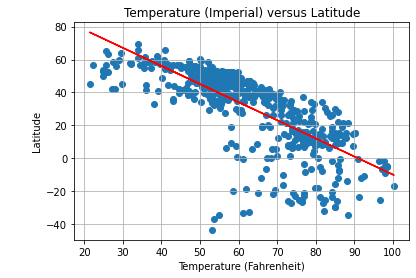

In [8]:
# Build a scatter plot: Temperature (Imperial) versus Latitude

x_values = weather_data["temp"]
y_values = weather_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data["temp"], weather_data["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.title("Temperature (Imperial) versus Latitude")
# Save the figure
plt.savefig("Output/TemperatureInWorldCities.png")
plt.show()

The r-squared is: 0.11760919702333202


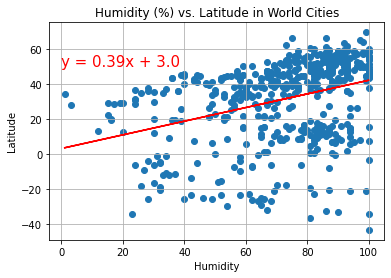

In [9]:
# Build a scatter plot: Humidity (%) vs. Latitude
x_values = weather_data["hum"]
y_values = weather_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data["hum"], weather_data["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Humidity (%) vs. Latitude in World Cities")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Output/HumidityInWorldCities.png")

plt.show()

The r-squared is: 0.0009954287190949219


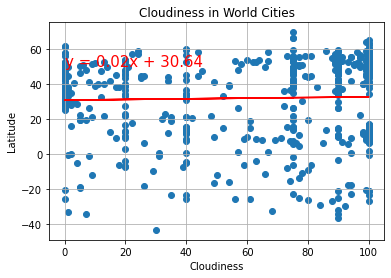

In [10]:
# Build a scatter plot: Cloudiness (%) vs. Latitude
x_values = weather_data["cloud"]
y_values = weather_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data["cloud"], weather_data["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Cloudiness in World Cities")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Output/CloudinessInWorldCities.png")

plt.show()

The r-squared is: 1.3823743651013368e-09


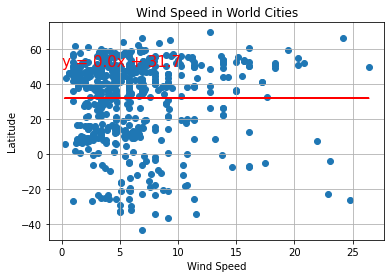

In [11]:
# Build a scatter plot: Wind Speed vs. Latitude
x_values = weather_data["wind"]
y_values = weather_data["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data["wind"], weather_data["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Wind Speed in World Cities")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("Output/WindSpeedInWorldCities.png")

plt.show()

In [12]:
weather_data_north=weather_data[weather_data["lat"]>=0]
weather_data_south=weather_data[weather_data["lat"]<0]

In [13]:
weather_data_south

,city,country,lat,lon,temp,hum,cloud,wind
4,Moss Vale,AU,-34.55,150.38,54.91,100,90,8.05
8,Christchurch,NZ,-43.53,172.63,53.08,100,30,6.93
11,Rio Novo do Sul,BR,-20.86,-40.94,74.17,87,99,8.70
15,Arroio do Meio,BR,-29.40,-51.95,84.99,65,84,5.01
40,Buriti Alegre,BR,-18.14,-49.04,79.79,70,94,8.01
...,...,...,...,...,...,...,...,...
517,Mahanje,TZ,-9.93,35.33,71.58,58,29,4.14
543,Nueva Italia,PY,-25.62,-57.50,96.80,28,40,4.70
552,Barberton,ZA,-25.79,31.05,72.72,49,0,11.41
555,La Unión,PE,-5.40,-80.75,81.14,44,4,17.49


The r-squared is: 0.637824461073423


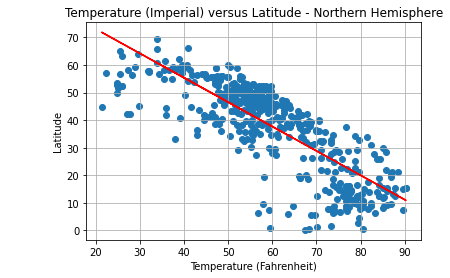

In [14]:
# Build a scatter plot: Temperature (Imperial) versus Latitude - Northern Hemisphere
x_values = weather_data_north["temp"]
y_values = weather_data_north["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_north["temp"], weather_data_north["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.title("Temperature (Imperial) versus Latitude - Northern Hemisphere")
# Save the figure
plt.savefig("Output/TemperatureInWorldCitiesNorthHem.png")
plt.show()

The r-squared is: 0.23082143648829329


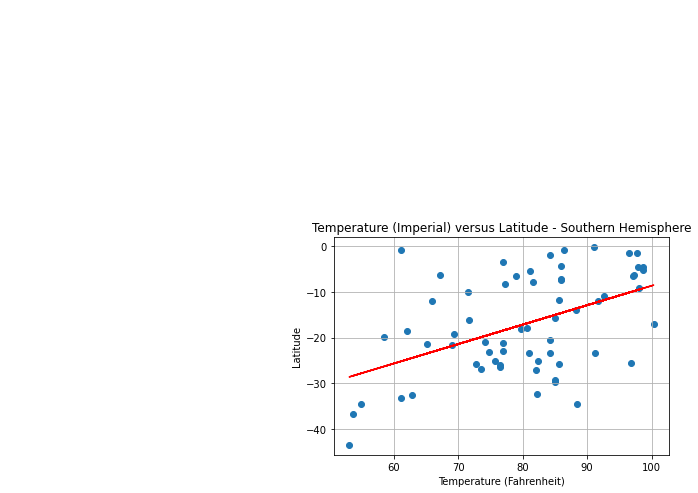

In [15]:
# Build a scatter plot: Temperature (Imperial) versus Latitude - Southern Hemisphere
x_values = weather_data_south["temp"]
y_values = weather_data_south["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_south["temp"], weather_data_south["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.grid(True)
plt.title("Temperature (Imperial) versus Latitude - Southern Hemisphere")
# Save the figure
plt.savefig("Output/TemperatureInWorldCitiesSouthHem.png")
plt.show()

The r-squared is: 0.06620531734102936


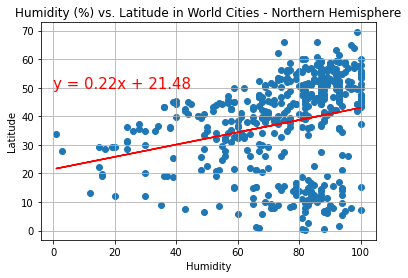

In [16]:
# Build a scatter plot: Humidity (%) vs. Latitude - Northern Hemisphere
x_values = weather_data_north["hum"]
y_values = weather_data_north["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_north["hum"], weather_data_north["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Humidity (%) vs. Latitude in World Cities - Northern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Output/HumidityInWorldCitiesNorthHem.png")

plt.show()

The r-squared is: 0.09829685240834896


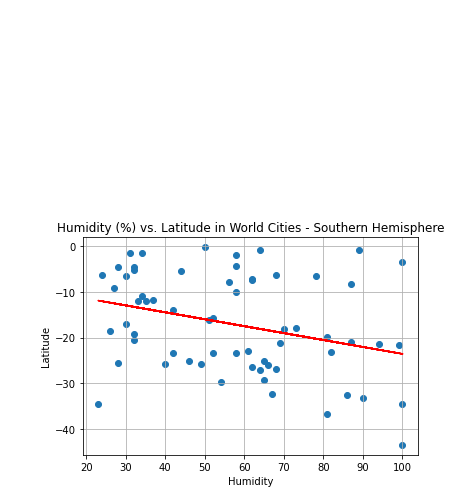

In [17]:
# Build a scatter plot: Humidity (%) vs. Latitude - Southern Hemisphere
x_values = weather_data_south["hum"]
y_values = weather_data_south["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_south["hum"], weather_data_south["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Humidity (%) vs. Latitude in World Cities - Southern Hemisphere")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Output/HumidityInWorldCitiesSouthHem.png")

plt.show()

The r-squared is: 0.0030170403624901476


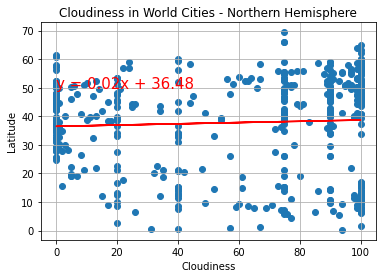

In [18]:
# Build a scatter plot: Cloudiness (%) vs. Latitude - Northern Hemisphere
x_values = weather_data_north["cloud"]
y_values = weather_data_north["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_north["cloud"], weather_data_north["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Cloudiness in World Cities - Northern Hemisphere")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Output/CloudinessInWorldCitiesNorthHem.png")

plt.show()

The r-squared is: 0.05382191070622561


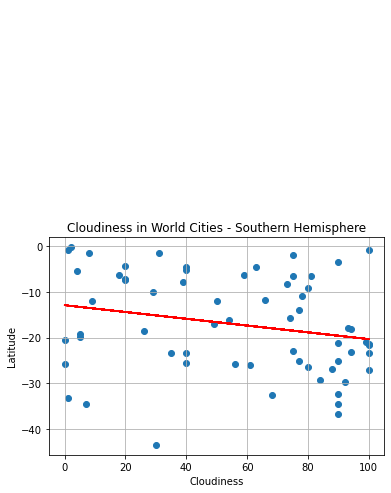

In [19]:
# Build a scatter plot: Cloudiness (%) vs. Latitude - Southern Hemisphere
x_values = weather_data_south["cloud"]
y_values = weather_data_south["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_south["cloud"], weather_data_south["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Cloudiness in World Cities - Southern Hemisphere")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Output/CloudinessInWorldCitiesSouthHem.png")

plt.show()

The r-squared is: 0.028897512269011712


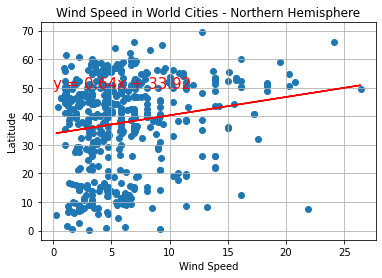

In [20]:
# Build a scatter plot: Wind Speed (mph) vs. Latitude - Northern Hemisphere
x_values = weather_data_north["wind"]
y_values = weather_data_north["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_north["wind"], weather_data_north["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Wind Speed in World Cities - Northern Hemisphere")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("Output/WindSpeedInWorldCitiesNorthHem.png")

plt.show()

The r-squared is: 0.025102403502705026


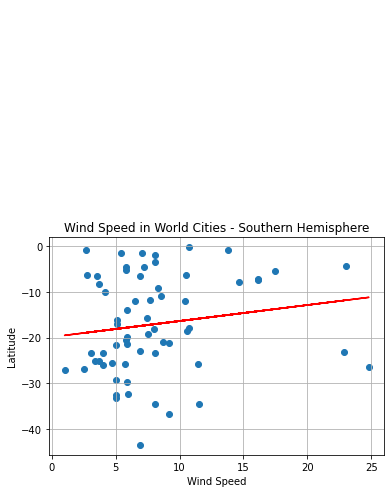

In [21]:
# Build a scatter plot: Wind Speed (mph) vs. Latitude - Southern Hemisphere
x_values = weather_data_south["wind"]
y_values = weather_data_south["lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weather_data_south["wind"], weather_data_south["lat"], marker="o")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.title("Wind Speed in World Cities - Southern Hemisphere")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("Output/WindSpeedInWorldCitiesSouthHem.png")

plt.show()